In [ ]:
import numpy as np
from princals import PRINCALS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
# Data for Guttman-Bell table
data = {
    'Object': [
        'Crowd', 
        'Modern community, Neighborhood', 
        'Public', 
        'Primary Group', 
        'Mob', 
        'Secondary Group', 
        'Audience'
    ],
    'Intensity of interaction': [1, 2, 1, 4, 4, 3, 2],
    'Frequency of interaction': [1, 3, 2, 4, 1, 3, 1],
    'Feeling of belong': [1, 2, 2, 4, 4, 3, 2],
    'Physical proximity': [2, 2, 1, 2, 2, 1, 2],
    'Formality of relationship': [2, 2, 1, 3, 3, 2, 2]
}

# Create DataFrame
df = pd.DataFrame(data)
data = df.drop(columns='Object').to_numpy()

In [3]:
var_types = ['ordinal', 'ordinal', 'ordinal', 'nominal', 'nominal']
model = PRINCALS(X= data, n_components= 2,var_types=var_types)
Z,W = model.fit(max_iter=100, tol= 1e-6)

Iteration 1, Loss: 1.0197408615087897
Iteration 2, Loss: 1.7033571523361604
Iteration 3, Loss: 1.3655631607241414
Iteration 4, Loss: 1.1197157579607202
Iteration 5, Loss: 0.9672849491449624
Iteration 6, Loss: 0.8936811422467716
Iteration 7, Loss: 0.8630257845536561
Iteration 8, Loss: 0.8513418334602922
Iteration 9, Loss: 0.8472514369118819
Iteration 10, Loss: 0.8460190488002689
Iteration 11, Loss: 0.8457900506648391
Iteration 12, Loss: 0.8458698778221783
Iteration 13, Loss: 0.8460134594031702
Iteration 14, Loss: 0.8461439027930034
Iteration 15, Loss: 0.8462439987092416
Iteration 16, Loss: 0.8463155873689764
Iteration 17, Loss: 0.8463650541990937
Iteration 18, Loss: 0.8463986296292823
Iteration 19, Loss: 0.8464212078805158
Iteration 20, Loss: 0.8464363215233525
Iteration 21, Loss: 0.8464464192155684
Iteration 22, Loss: 0.8464531632447243
Iteration 23, Loss: 0.8464576698216628
Iteration 24, Loss: 0.8464606843739793
Iteration 25, Loss: 0.8464627035165985
Iteration 26, Loss: 0.846464057893

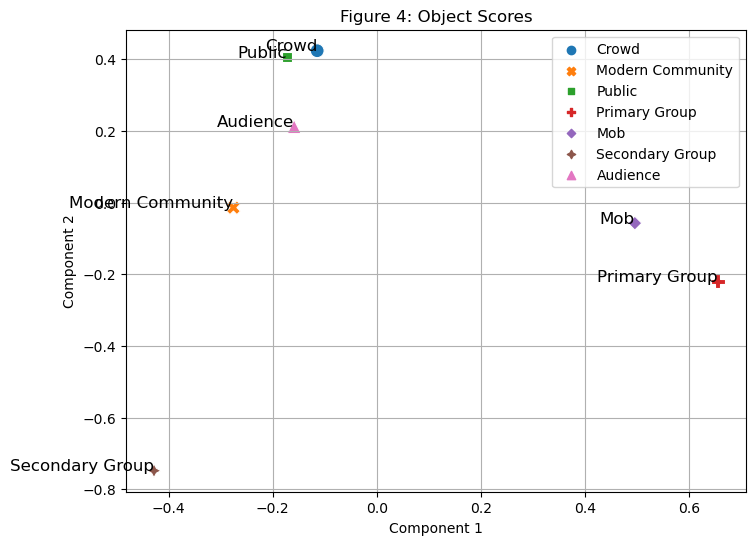

In [4]:
# Create a DataFrame for better handling in seaborn
object_labels = ['Crowd', 'Modern Community', 'Public', 'Primary Group', 'Mob', 'Secondary Group', 'Audience']

# Create a DataFrame for better handling in seaborn
df_Z = pd.DataFrame(Z, columns=['Component 1', 'Component 2'])
df_Z['Object'] = object_labels

# Plot Figure 4: Object Scores
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_Z, x='Component 1', y='Component 2', hue='Object', style='Object', s=100)
for i, label in enumerate(object_labels):
    plt.text(Z[i, 0], Z[i, 1], label, fontsize=12, ha='right')
plt.title('Figure 4: Object Scores')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()